# Comparison of Corrected and Filtered Acceleration Data

In [1]:
import cftime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from scipy import signal

import mission_tools

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
mission_nc_path = '../microSWIFT_data/final_dataset/mission_19.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission_dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: DUNEX microSWIFT drifter - Mission 19
    institution: University of Washington - Applied Physics Lab
    source: Observations from microSWIFT drifters deployed in the DUring Nearshore Events eXperiment (DUNEX)
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    creator_country: USA
    creator_email: erainvil@uw.edu
    creator_name: EJ Rainville, Jim Thomson, Melissa Moulton, and Morteza Derakhti at University of Washington - Applied Physics Lab
    creator_phone: (303) 653-1226
    creator_sector: academic
    creator_state: Washington
    featureType: trajectory
    cdm_data_type: Trajectory
    platform: microSWIFT wave buoy
    publisher_country: USA
    publisher_email: frfwebmaster@usace.army.mil
    publisher_name: USACE/CHL/COAB
    history: 2022-12-28 23:19:30.831831 Python
    references: https://github.com/SASlabgroup/microSWIFT and http

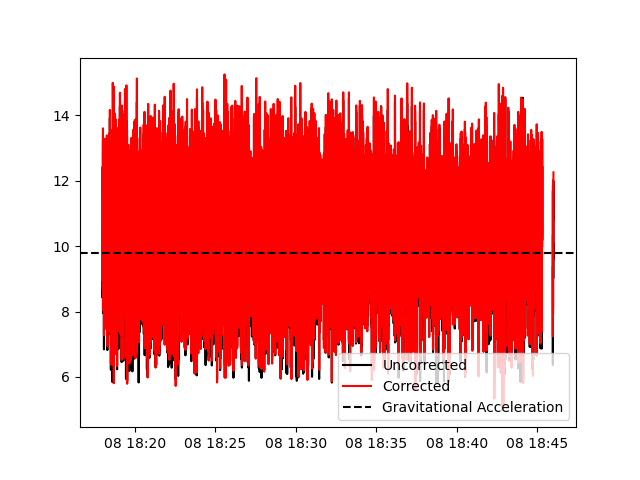

In [3]:
time = cftime.num2pydate(mission_dataset['time'],
                         units=mission_dataset['time'].units,
                         calendar=mission_dataset['time'].calendar)

trajectory = 0
start_ind = 0
end_ind = -1
fig, ax = plt.subplots()
ax.plot(time[start_ind:end_ind],
        mission_dataset['acceleration_z_body'][trajectory,start_ind:end_ind],
        color='k',
        label='Uncorrected')

ax.plot(time[start_ind:end_ind],
        mission_dataset['acceleration_ud'][trajectory, start_ind:end_ind],
        color='r',
        label='Corrected')

ax.axhline(9.8, linestyle='dashed', color='k', label='Gravitational Acceleration')
ax.legend()

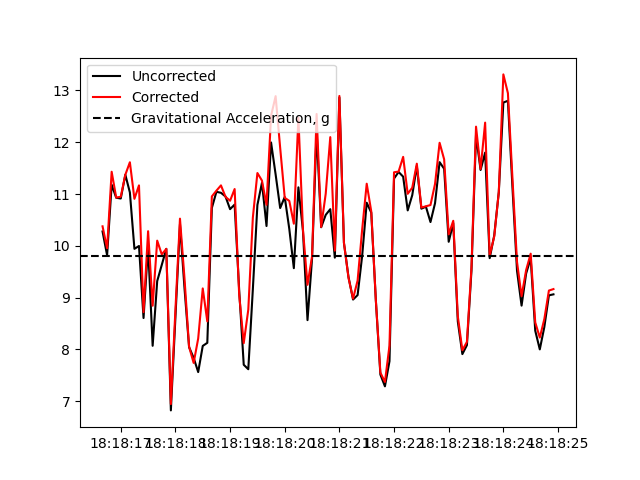

In [4]:
start_ind = 200
end_ind = 300
fig, ax = plt.subplots()
ax.plot(time[start_ind:end_ind],
        mission_dataset['acceleration_z_body'][trajectory,start_ind:end_ind],
        color='k',
        label='Uncorrected')

ax.plot(time[start_ind:end_ind],
        mission_dataset['acceleration_ud'][trajectory, start_ind:end_ind],
        color='r',
        label='Corrected')

ax.axhline(9.8, linestyle='dashed', color='k', label='Gravitational Acceleration, g')
ax.legend()

(5.3782278, 14.9775142, 4.464252359486389, 15.767921059272796)

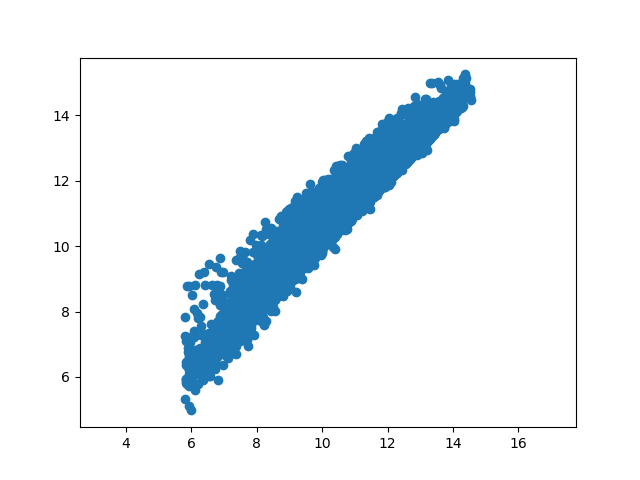

In [5]:
fig, ax = plt.subplots()
ax.scatter(mission_dataset['acceleration_z_body'][trajectory,:],
           mission_dataset['acceleration_ud'][trajectory,:])
ax.axis('equal')